# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2.Importación fuente de datos

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() #Por defecto hace split 6/7 train y 1/7 para test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 


In [50]:
x_train.shape #60.000 imágenes de 28x28 pixels

(60000, 28, 28, 1)

In [51]:
x_test.shape

(10000, 28, 28, 1)

# 3.Preprocesado

## 3.1Visualización de imágenes

In [5]:
primera_imagen = x_train[0]

In [6]:
primera_imagen

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
primera_imagen.shape

(28, 28)

In [8]:
#Visualizamos la primera imagen
plt.imshow(primera_imagen,cmap='gray') #seleccionamos escala B&N: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [9]:
x_test.shape

(10000, 28, 28)

## 3.2 Transformación categórica de la salida

In [10]:
#Etiquetas de salida
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Las etiquetas son categorías de números, es necesario traducir con "one hot enconder" para que la CNN pueda interpretrarlo, sino la CNN pensará que es algún tipo de regresión en un eje continuo

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
categ_y_train = to_categorical(y_train)

In [15]:
categ_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
categ_y_train.shape

(60000, 10)

In [17]:
categ_y_train[0] #al ser la categoría "5", aparece un "1" en la posición 5 del array

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [18]:
y_cat_train = to_categorical(y_train,10) #10 es el número de categorías, aunque por defecto se infiere el número de categorías diferentes detectadas

In [19]:
y_cat_test = to_categorical(y_test,10) 

## 3.3 Escalado

In [20]:
primera_imagen.max()

np.uint8(255)

In [21]:
primera_imagen.min()

np.uint8(0)

In [22]:
#Aplicamos el factor 1/255 para escalar y que los valores de la imagen estén entre 0 y 1
x_train = x_train/255
x_test = x_test/255

In [23]:
primera_imagen_esc = x_train[0]

In [24]:
primera_imagen_esc.max()

np.float64(1.0)

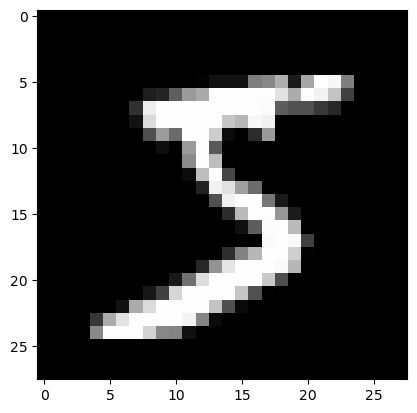

In [26]:
plt.imshow(primera_imagen_esc,cmap='gray')
plt.show()

In [27]:
primera_imagen_esc

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 3.4 Redimensionar imágenes

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_test.shape

(10000, 28, 28)

Aplicamos reshape para incluir la dimensión del canal (en este caso, al ser B&N solamente sería 1 canal)

In [30]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [31]:
x_train.shape

(60000, 28, 28, 1)

In [32]:
x_test = x_test.reshape(10000,28,28,1)

In [33]:
x_test.shape

(10000, 28, 28, 1)

# 4.Creación del Modelo

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [49]:
#Ejecuta esta creación del modelo si usas Tensorflow 2.0, sino omite esta sentencia y ejecuta la siguiente para Tensorflow 2.2 o posterior
#model = Sequential()

# CAPA CONVOLUCIONAL (número de filtros creciente conforme mayor tamaño de imagen, kernel_size es la rejilla sobre la que se aplica el filtro)
#model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))
# CAPA POOLING
#model.add(MaxPool2D(pool_size=(2, 2))) #Típico 2,2 para aun kernel_size de 4,4, siempre tamaño menor que el kernel

# CAPA FLATTEN: Convierte las imágenes de 28x28 en un array de 1 dimensión de 28x28 = 784 valores antes de la capa final
#model.add(Flatten())

# CAPA DENSE (Indicar neuronas potencia de 2, variable para optimizar modelo)
#model.add(Dense(128, activation='relu'))

# CAPA FINAL DE CLASIFICACIÓN (10 posibles clases = 10 neuronas)
#model.add(Dense(10, activation='softmax'))

#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy']) # se pueden añadir más métricas https://keras.io/metrics/

In [45]:
#En Tensorflow 2.2 se recomienda esta estructura de capas en el modelo en lugar de usar model.add
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28, 1)),                     # <-- define la entrada aquí
    Conv2D(filters=32, kernel_size=(4, 4), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),                                    # sale un vector de 784 si no hay padding previo
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Usa 'categorical_crossentropy' si y está one-hot; si y son enteros 0–9, usa 'sparse_categorical_crossentropy'
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

# 5.Entrenamiento del modelo

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [54]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9857 - val_loss: 0.0550
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0044 - val_accuracy: 0.9888 - val_loss: 0.0417
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9988 - loss: 0.0036 - val_accuracy: 0.9874 - val_loss: 0.0533
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9984 - loss: 0.0050 - val_accuracy: 0.9874 - val_loss: 0.0509
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9991 - loss: 0.0025 - val_accuracy: 0.9856 - val_loss: 0.0708


In [55]:
model.metrics_names

['loss', 'compile_metrics']

In [56]:
losses = pd.DataFrame(model.history.history)

In [57]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.998350,0.005171,0.9857,0.055010
1,0.998500,0.004439,0.9888,0.041724
2,0.998833,0.003618,0.9874,0.053338
3,0.998350,0.005043,0.9874,0.050877
4,0.999133,0.002502,0.9856,0.070776


In [58]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

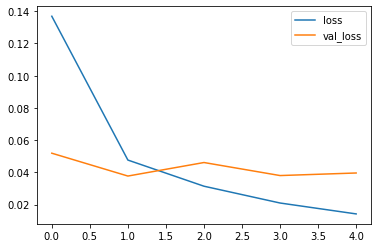

In [44]:
losses[['loss','val_loss']].plot()

In [59]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[0.07077554613351822, 0.9855999946594238]


# 6. Evaluación del modelo

## 6.1 Predicción sobre el conjunto de Test

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
predictions = np.argmax(model.predict(x_test), axis=-1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step


In [ ]:
#Usar si la sale predict_classes como deprecated: predictions = np.argmax(model.predict(x_test), axis=-1)

In [64]:
y_cat_test.shape

(10000, 10)

In [65]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [66]:
predictions[0]

np.int64(7)

In [67]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [69]:
confusion_matrix(y_test,predictions)

array([[ 974,    1,    2,    0,    0,    0,    1,    1,    1,    0],
       [   1, 1124,    4,    2,    1,    2,    0,    1,    0,    0],
       [   1,    0, 1020,    0,    3,    0,    0,    5,    3,    0],
       [   0,    0,    3, 1001,    0,    3,    0,    1,    2,    0],
       [   0,    0,    0,    0,  980,    0,    0,    0,    0,    2],
       [   2,    1,    1,   11,    0,  873,    4,    0,    0,    0],
       [   5,    4,    0,    1,    7,    3,  934,    0,    4,    0],
       [   0,    0,    5,    1,    1,    0,    0, 1019,    0,    2],
       [   3,    0,    1,    2,    1,    1,    1,    2,  960,    3],
       [   1,    1,    0,    2,   18,    6,    0,    6,    4,  971]])

In [70]:
import seaborn as sns

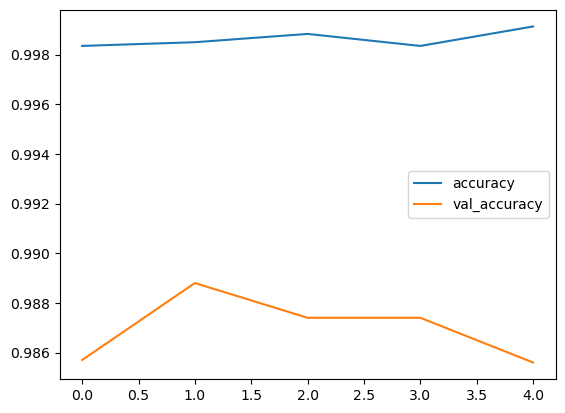

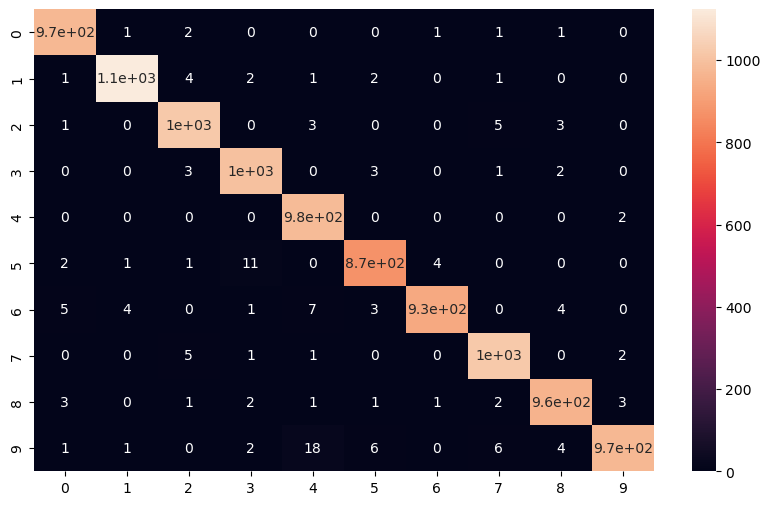

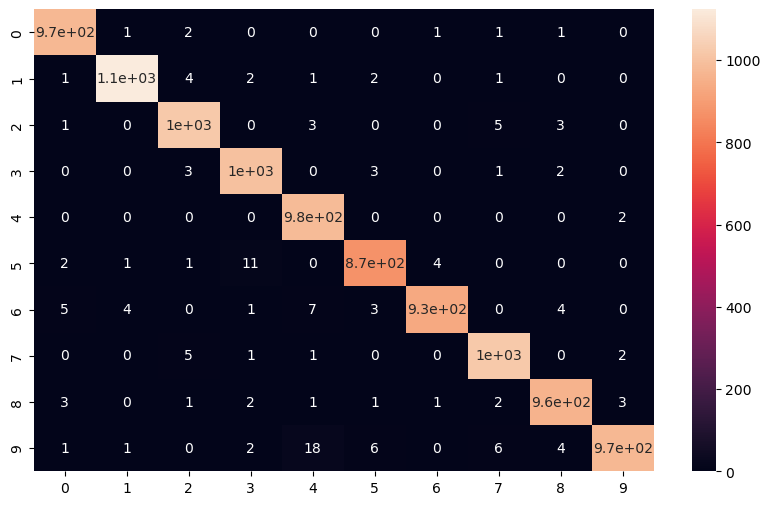

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

# 6.2 Predicción para una nueva imagen

In [73]:
nueva_imagen = x_test[1] #Cogemos como ejemplo la primera imagen del conjunto de test

In [74]:
nueva_imagen.shape

(28, 28, 1)

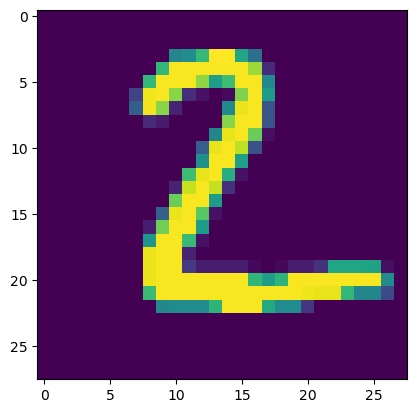

In [75]:
plt.imshow(nueva_imagen.reshape(28,28)) #quitamos la información de canal, si no se especifica cmap=gray, por defecto es viridis
plt.show()

In [77]:
#Dimensiones necesarias para predicción --> (num_imag,anchura,altura,canales_color)
np.argmax(model.predict(nueva_imagen.reshape(1,28,28,1)), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([2])